In [2]:
import pandas as pd
import numpy as np
import os

### Data Visualization 
Pandas uses the Matplotlib API to create charts and visualize data.


In [3]:
# Set paths
# Working from the Scripts folder as the base path
exercise_path = '../Python/Exercise Files/Pandas Course Resources/Pandas Course Resources/retail/'
transactions = pd.read_csv(os.path.join(exercise_path, "transactions.csv"), parse_dates=['date'])
transactions2 = transactions.assign(month = transactions["date"].dt.month,
            day_of_week = transactions["date"].dt.day,
            year = transactions["date"].dt.year)

<Axes: >

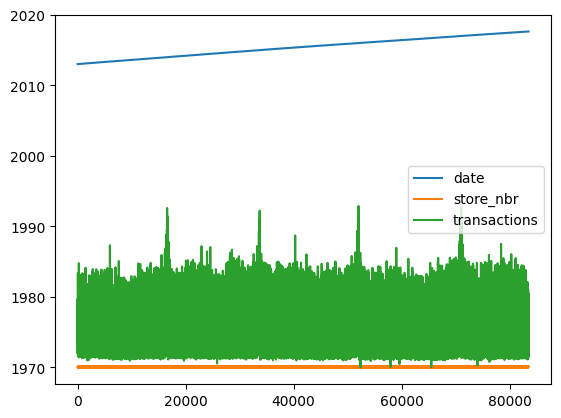

In [4]:
transactions.plot()

<Axes: xlabel='date'>

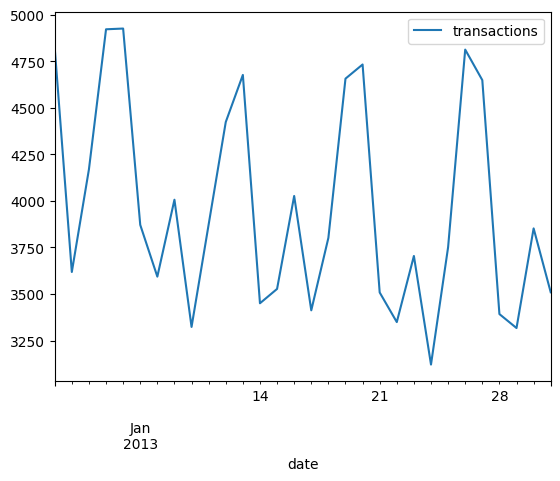

In [5]:
transactions2.set_index("date").query("year == 2013 and month == 1 and store_nbr == 44").plot(y = "transactions")

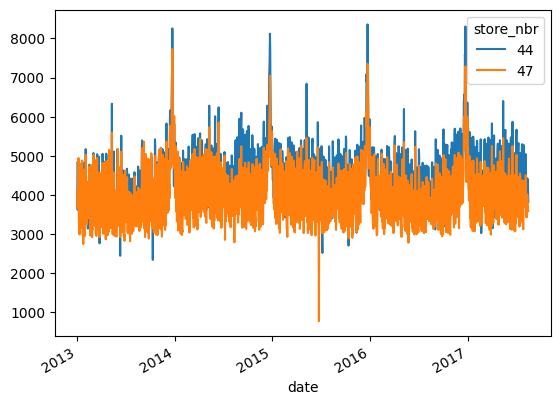

In [6]:
(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index ="date", columns = "store_nbr")
 .droplevel(0, axis=1)
 .plot()
); # Add in semi-column to suppress output of <xxx>

In [7]:
oil_path = os.path.join(exercise_path, 'oil.csv')  
oil_df = pd.read_csv(oil_path, parse_dates=["date"])
oil_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


<Axes: xlabel='date'>

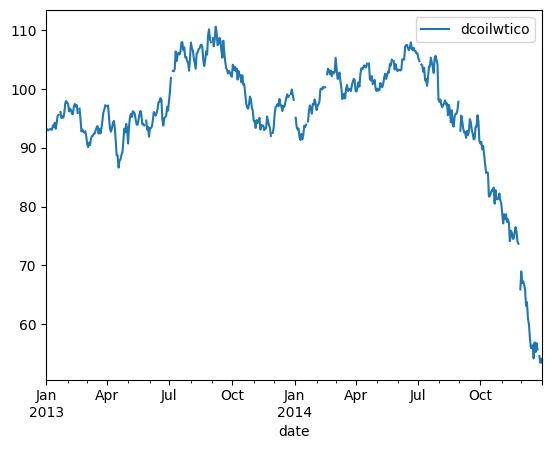

In [8]:
# Once we set the index, we can filter on it and then make subsetted plots easily
oil_df.set_index(oil_df["date"]).loc["2013":"2014"].plot(y="dcoilwtico")

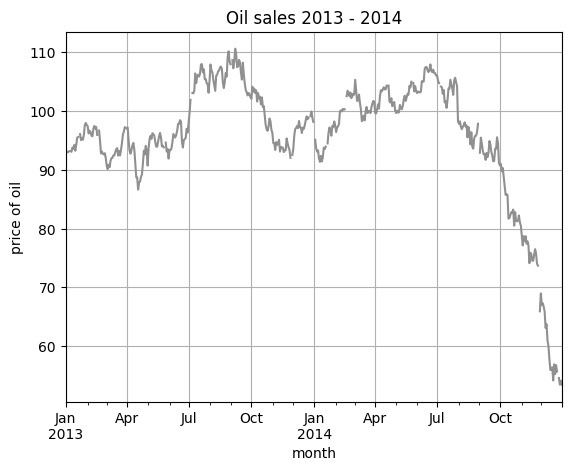

In [9]:
# Once we set the index, we can filter on it and then make subsetted plots easily
(oil_df.set_index(oil_df["date"])
 .loc["2013":"2014"]
 .plot(y="dcoilwtico", 
       title = "Oil sales 2013 - 2014",
       xlabel = "month", 
       ylabel = "price of oil",
       legend = False,
       color = "#909090",
       grid = True)
);

In [10]:
oil_df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


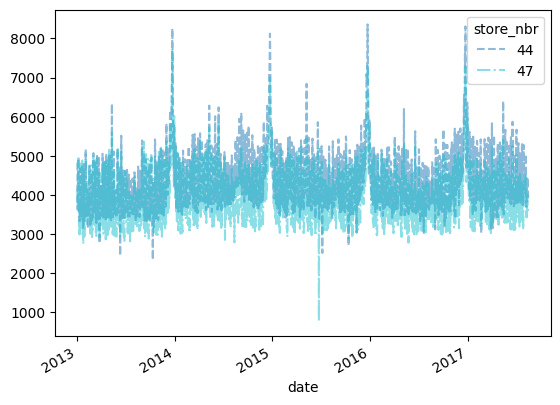

In [11]:
(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index ="date", columns = "store_nbr")
 .droplevel(0, axis=1)
 .plot(cmap = "tab10",
       style = ["--", "-."], 
       alpha = 0.5)
); 

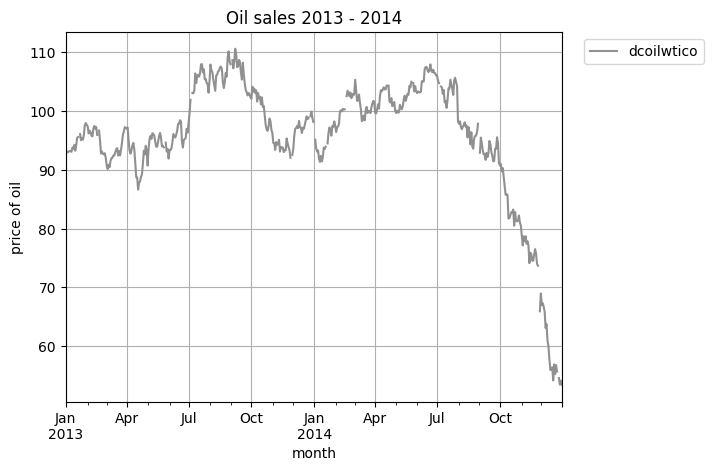

In [12]:
(oil_df.set_index(oil_df["date"])
 .loc["2013":"2014"]
 .plot(y="dcoilwtico", 
       title = "Oil sales 2013 - 2014",
       xlabel = "month", 
       ylabel = "price of oil",
       color = "#909090",
       grid = True)
).legend(bbox_to_anchor=(1.3, 1));

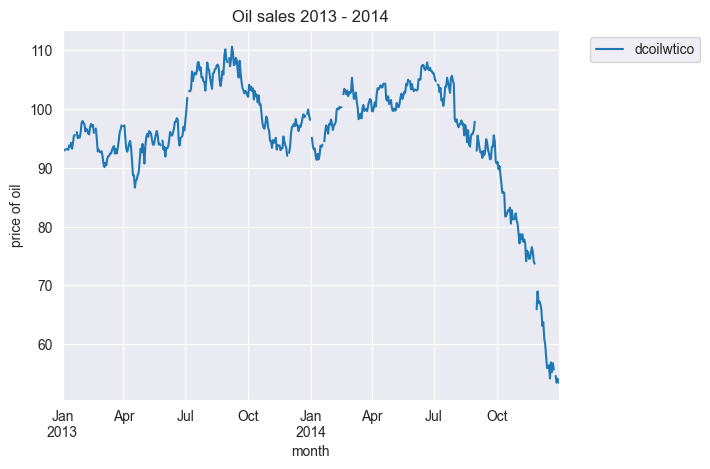

In [13]:
import seaborn as sns

# Set style in advance to make plots
sns.set_style("darkgrid")

(oil_df.set_index(oil_df["date"])
 .loc["2013":"2014"]
 .plot(y="dcoilwtico", 
       title = "Oil sales 2013 - 2014",
       xlabel = "month", 
       ylabel = "price of oil",
       grid = True)
).legend(bbox_to_anchor=(1.3, 1));


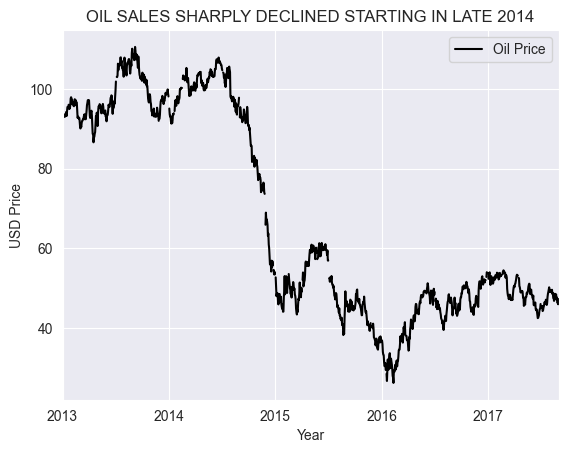

In [14]:
import seaborn as sns
sns.set_style("darkgrid")

oil = oil_df.rename(columns={"dcoilwtico": "Oil Price"})
(oil.set_index(oil["date"])
 .loc["2013":"2017"]
 .plot(kind = "line", 
       y="Oil Price", 
       title = "OIL SALES SHARPLY DECLINED STARTING IN LATE 2014",
       xlabel = "Year", 
       ylabel = "USD Price",
       grid = True,
       c = "black")
);

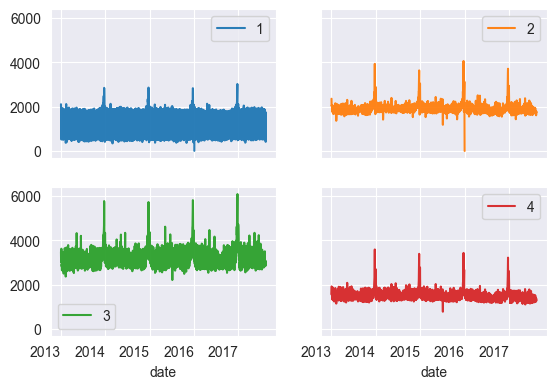

In [15]:
# Filter transactions data to stores 1-4, then create a 2x2 sm plot. Make sure axes are shared
(transactions
 .query("store_nbr in [1, 2, 3, 4]") # Could also use .loc[transactions["store_nbr"].isin([1, 2, 3, 4])]
 .pivot_table(index ="date", columns = "store_nbr")
 .droplevel(0, axis=1)
 .plot(
       alpha = 0.95,
       subplots = True,
       sharey = True,
       sharex = True,
       layout = (2, 2), 
       rot = 0)
); 

<Axes: title={'center': 'STORE 44 HAS THE MOST TRANSACTIONS'}, ylabel='store_nbr'>

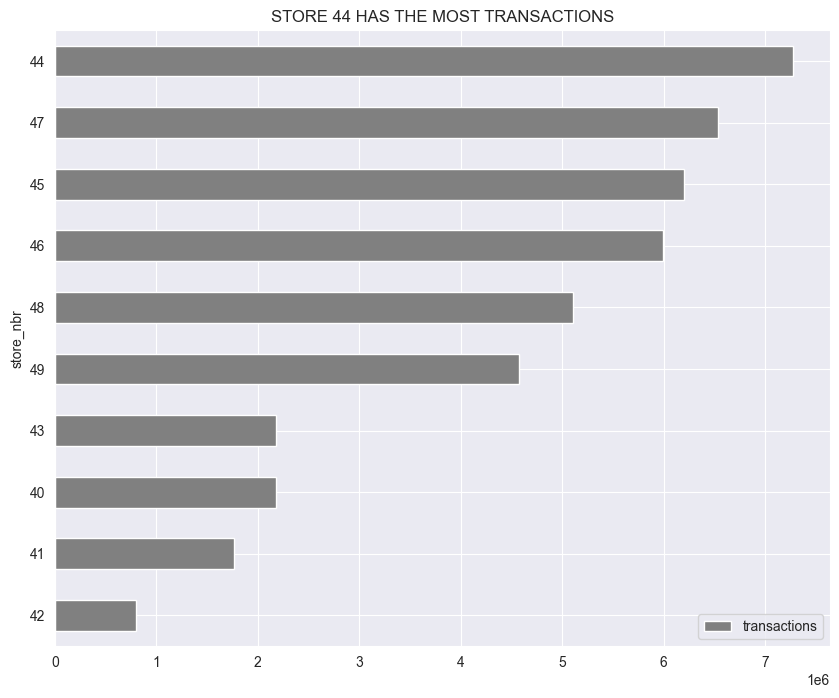

In [16]:
store_40s = list(range(40, 50))

transactions = pd.read_csv(os.path.join(exercise_path, "transactions.csv"), parse_dates=["date"])
(transactions
 .query("store_nbr in @store_40s")
 .groupby(["store_nbr"])
 .agg({"transactions":"sum"})
 .sort_values(by = "transactions", ascending=True)
# .loc[transactions["store_nbr"].isin([1, 2])]
.plot.barh(figsize = (10, 8),
          color = "#808080",
          title = "STORE 44 HAS THE MOST TRANSACTIONS")
)

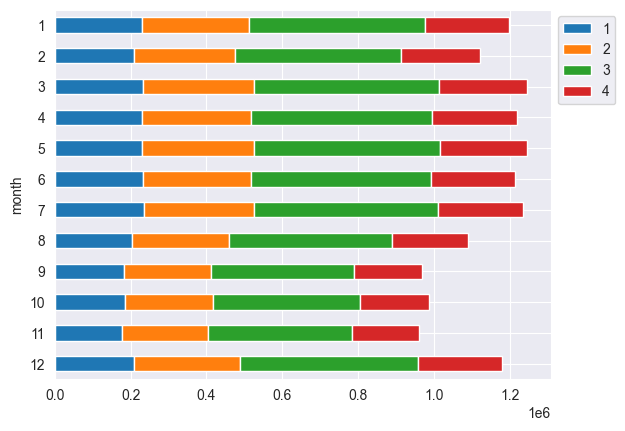

In [17]:
# Create a horizontal bar chart with y axis as month, x axis as sales, sorted by month for stores 1 -4
store_1to4 = list(range(1, 5))

(transactions
 .query("store_nbr in @store_1to4")
 .assign(month = transactions["date"].dt.month)
 .groupby(["store_nbr", "month"])
 .agg({"transactions":"sum"})
 .reset_index()
 .pivot_table(index = "month",
              columns="store_nbr",
              values = "transactions",
              aggfunc= "mean")

 .sort_index(ascending=False)    # sort in ascending order so lowest comes first (technically this code is redundant)
 .plot.barh(stacked=True)        # created stacked bar chart (will stack by column names)
 .legend(bbox_to_anchor=(1, 1)) 
)

In [ ]:
transactions = pd.read_csv(os.path.join(exercise_path, "transactions.csv"))


stores_1234 = (transactions
                .loc[transactions["store_nbr"].isin([1, 2, 3, 4])]  #filter to stores 1, 2, 3, 4
                .pivot_table(index="date", columns="store_nbr") # Createa pivot table
                .droplevel(0, axis=1))  # drop outer layer of column axis

# convert dates to datetime64
stores_1234.index = stores_1234.index.astype("datetime64[ns]") 
stores_1234.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1678 entries, 2013-01-02 to 2017-08-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1676 non-null   float64
 1   2       1677 non-null   float64
 2   3       1676 non-null   float64
 3   4       1676 non-null   float64
dtypes: float64(4)
memory usage: 65.5 KB


In [19]:
# Calculate monthly sum for each store groupbed by month
# stores_1234.index.month will allow you to groupby the month!

stores_1234_monthly = stores_1234.groupby(stores_1234.index.month).sum()

stores_1234_monthly

store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


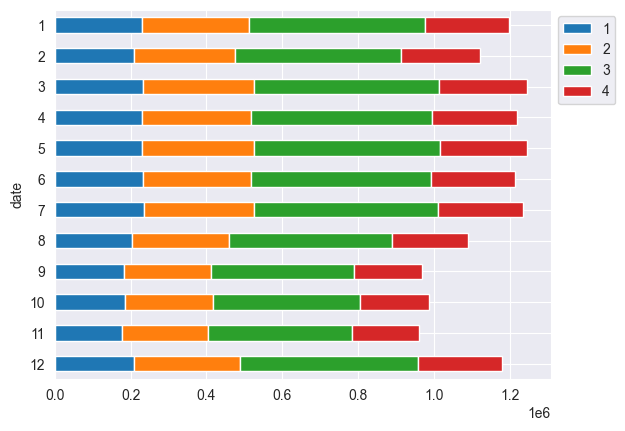

In [20]:
(stores_1234_monthly
 .sort_index(ascending=False)    # sort in ascending order so lowest comes first (technically this code is redundant)
 .plot.barh(stacked=True)        # created stacked bar chart (will stack by column names)
 .legend(bbox_to_anchor=(1, 1))  # Move legend to better location
)

/var/folders/y7/p6k2fh7s3rz0qzq7d9hkljkw0000gn/T/ipykernel_1002/442988524.py:12: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  stores_2and3.plot.scatter(x = 3, y = 2, color = stores_2and3.index.month, colormap = "Set2")


<Axes: xlabel='3', ylabel='2'>

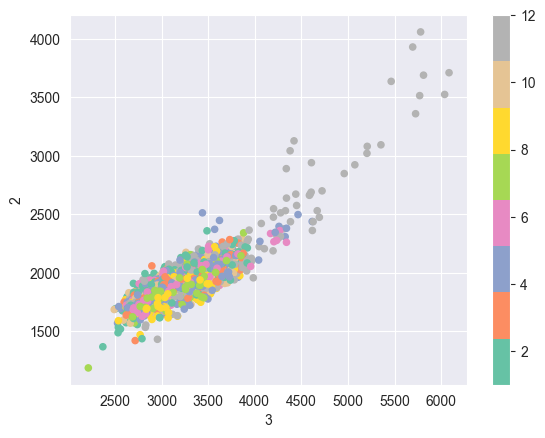

In [50]:
transactions = pd.read_csv(os.path.join(exercise_path, "transactions.csv"), parse_dates = ["date"])
store_2to3 = list(range(2, 4))

stores_2and3 = (transactions
 .query("store_nbr in @store_2to3")
 .pivot_table(index = "date", 
              columns = "store_nbr",
              values = "transactions",
              aggfunc = "sum")
)

stores_2and3.plot.scatter(x = 3, y = 2, color = stores_2and3.index.month, colormap = "Set2")


<Axes: ylabel='Frequency'>

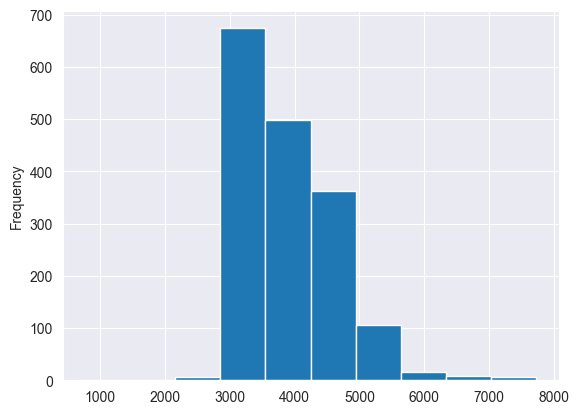

In [53]:
transactions.loc[transactions["store_nbr"] == 47, "transactions"].plot.hist()

<Axes: ylabel='Frequency'>

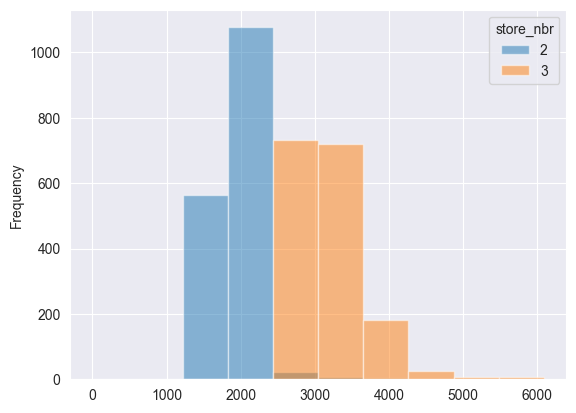

In [62]:
stores_2and3.loc[:, [2, 3]].plot.hist(alpha = 0.5)